In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

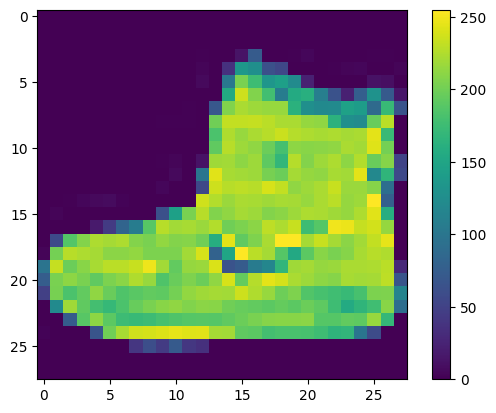

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

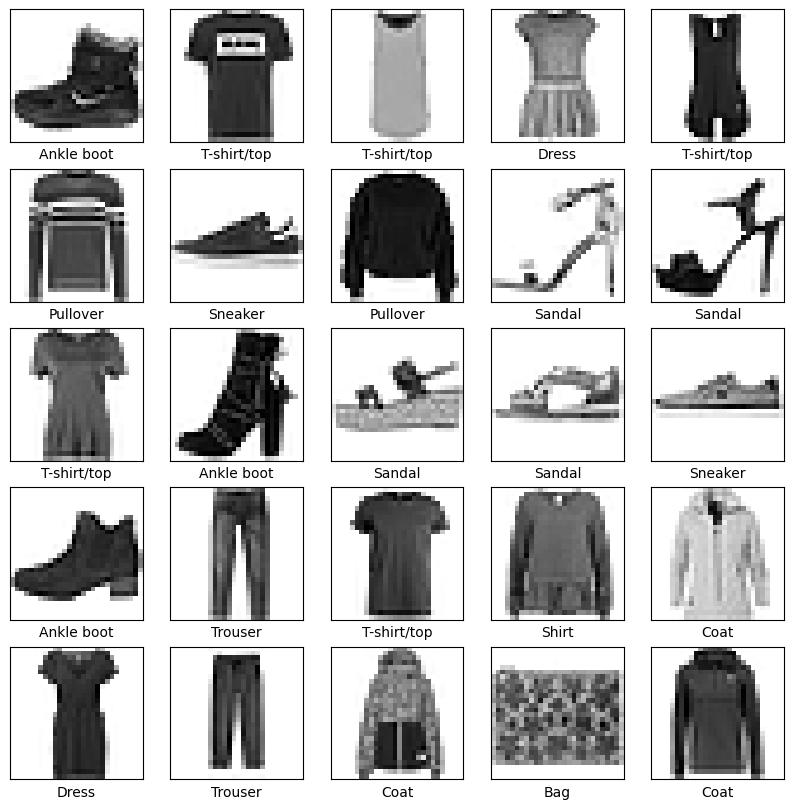

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2296 - accuracy: 0.9140
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2217 - accuracy: 0.9176
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2138 - accuracy: 0.9199
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2085 - accuracy: 0.9212
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2022 - accuracy: 0.9241
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1968 - accuracy: 0.9271
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1916 - accuracy: 0.9277
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1868 - accuracy: 0.9289
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1806 - accuracy: 0.9333
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.175

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1725 - accuracy: 0.9359
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1688 - accuracy: 0.9360
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1629 - accuracy: 0.9396
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1597 - accuracy: 0.9395
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1567 - accuracy: 0.9399
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1528 - accuracy: 0.9423
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1493 - accuracy: 0.9433
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1457 - accuracy: 0.9452
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1435 - accuracy: 0.9456
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.141

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4029 - accuracy: 0.8904 - 687ms/epoch - 2ms/step

Test accuracy: 0.8903999924659729


In [19]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [20]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [21]:
predictions[0]

array([5.1664510e-13, 9.6853313e-15, 8.1059300e-15, 4.2312394e-23,
       1.0743278e-15, 1.8771625e-06, 2.7122223e-11, 6.0273457e-04,
       2.5434336e-12, 9.9939537e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [23]:
test_labels[0]

9

In [24]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

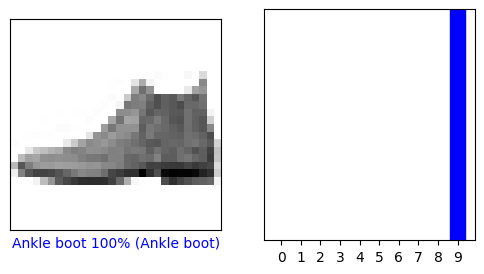

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

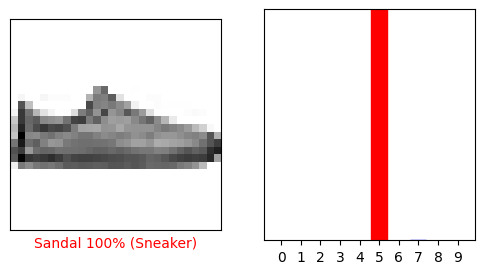

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

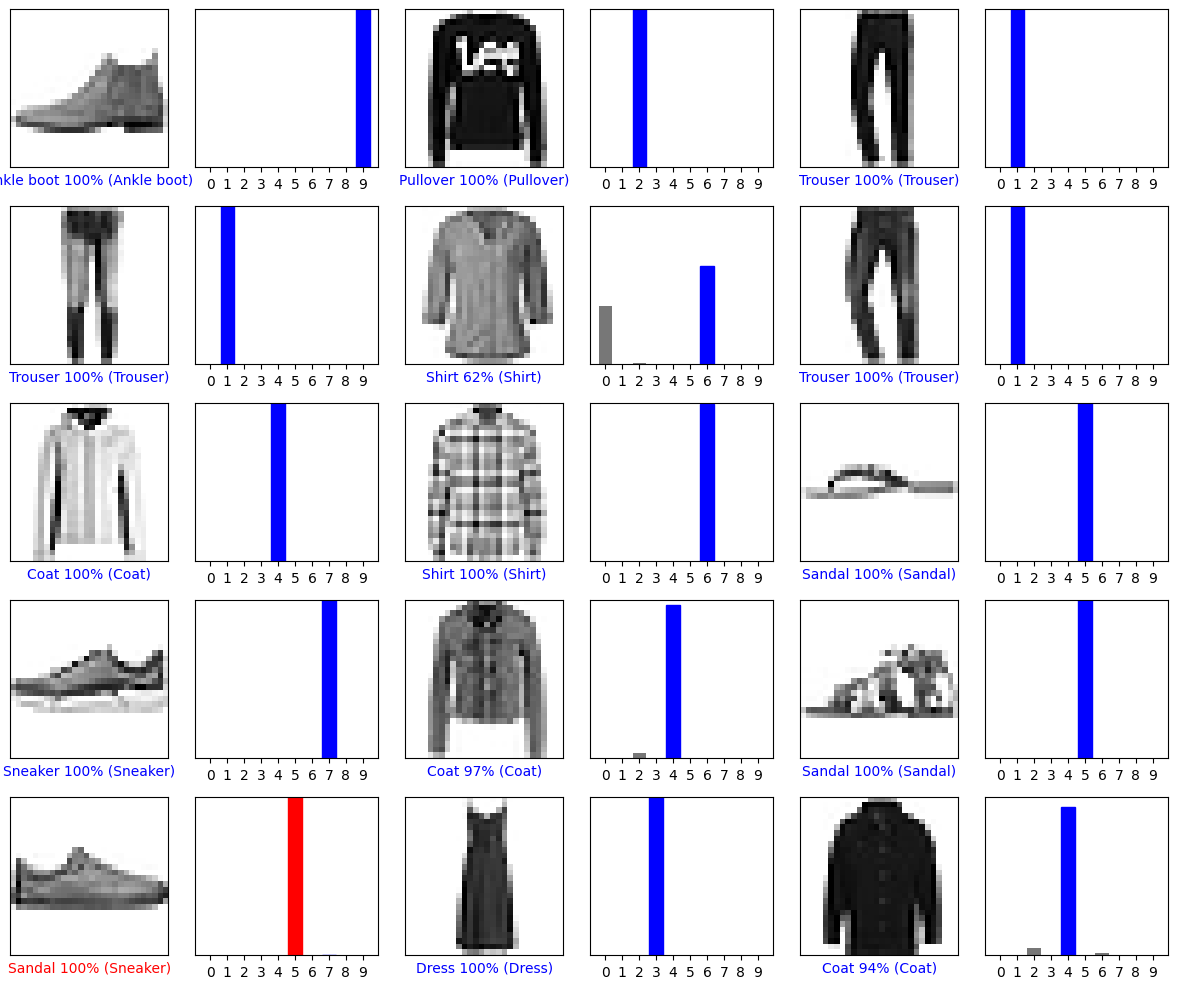

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [28]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [29]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 47ms/step
[[3.3200809e-05 1.4051994e-20 9.9952948e-01 7.9805386e-15 4.3396567e-04
  1.8008294e-16 3.3411732e-06 5.8064920e-26 1.7533725e-15 1.5215270e-15]]


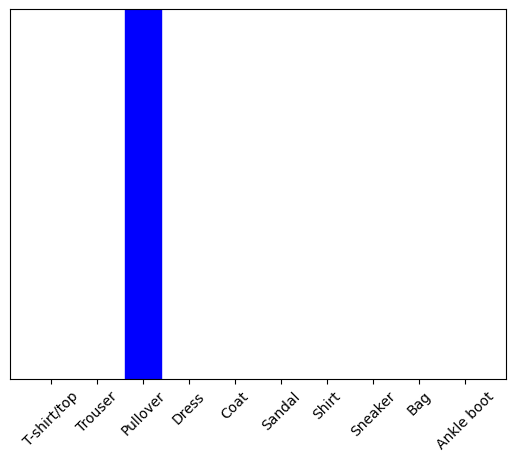

In [31]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [32]:
np.argmax(predictions_single[0])

2